In [4]:
!pip3 install matplotlib pandas


In [5]:
import pandas as pd 
import matplotlib.pyplot as plt


In [6]:
df= pd.read_csv("Spotify_maus_year.csv", sep= ";")


df_avg= df.groupby(["Year", "Region"])["Mau (in %)"].mean().unstack() #annual year calculate

df_avg.plot(kind="bar",figsize=(12,6),colormap="tab10") 

plt.ylabel("annual averge of Mau in %  ")

plt.xticks(rotation = 0)
plt.legend(title = "Region", bbox_to_anchor =(1.05,1), loc= "upper left")
plt.grid (axis = "y", linestyle="--", alpha=0.7)
plt.show()
# In which global regions (Europe, Africa, Asia, North America, South America, Oceania) is Spotify most widely used?

FileNotFoundError: [Errno 2] No such file or directory: 'Spotify_maus_year.csv'

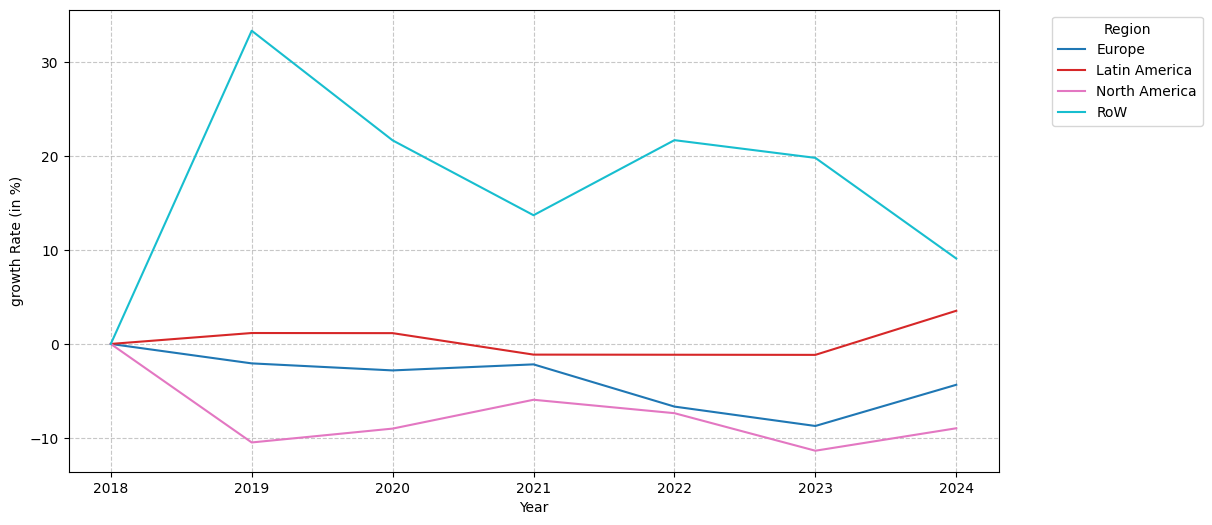

In [ ]:
df= pd.read_csv("Spotify_maus_year.csv", sep= ";")

df['Year'] = df['Year'].astype(int) 

df_avg = df.groupby(["Year", "Region"])["Mau (in %)"].mean().unstack() # annual year calculate

growth_rate = df_avg.pct_change(axis = "index") *100 
growth_rate.loc[2018]= 0 
growth_rate.plot(kind = "line", figsize=(12,6), colormap ="tab10")

plt.ylabel("growth Rate (in %)")
plt.xlabel("Year")

plt.xticks(rotation=0)

plt.legend(title = "Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle = "--", alpha = 0.7)


#What are the key regions contributing to Spotify’s user growth?
plt.show()

In [5]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 6.6 MB/s eta 0:00:00a 0:00:01


In [7]:
import plotly.express as px
import plotly.io as pio


############daynamic visu###########


pio.renderers.default = "browser"

df_avg=df.groupby(["Year","Region"])["Mau (in %)"].mean().reset_index() #anual year calculate



continent_coords = {
    "Europe": {"lat": 54, "lon":10 },
    "Latin America": {"lat":-10,"lon": -60},
    "North America":{"lat": 50, "lon":-100},
    "Africa":{"lat":0, "lon": 20}, #row
    "Asia": {"lat": 30, "lon": 100},  # RoW 
    "Oceania": {"lat": -25, "lon": 133},  # row (australia)

}
df_expanded = []
for _, row in df_avg.iterrows():
    if row["Region"] == "RoW":
        for subregion in ["Asia", "Oceania", "Africa"]:
            new_row = row.copy()
            new_row["Region"] = subregion
            df_expanded.append(new_row)
    else:
        df_expanded.append(row)

df_expanded = pd.DataFrame(df_expanded)

# coords
df_expanded["lat"] = df_expanded["Region"].map(lambda x: continent_coords[x]["lat"])
df_expanded["lon"] = df_expanded["Region"].map(lambda x: continent_coords[x]["lon"])


fig = px.scatter_geo(df_expanded,
                     lat="lat", lon="lon",
                     text="Region",
                     size="Mau (in %)",
                     animation_frame="Year",  # Slider für Jahresauswahl
                     title="Spotify MAU (in %) per year",
                     projection="natural earth",
                     color="Mau (in %)",
                     color_continuous_scale="Viridis")

fig.show()

NameError: name 'df' is not defined